In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1')
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
df.shape

(1599999, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [5]:
df.isnull().sum() # check missing values

0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

0                                                                                                                       int64
1467810369                                                                                                              int64
Mon Apr 06 22:19:45 PDT 2009                                                                                           object
NO_QUERY                                                                                                               object
_TheSpecialOne_                                                                                                        object
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    object
dtype: object

In [8]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [9]:
new_columns = ['target', 'ids','date' ,'falg','user', 'text']
df = df.rename(columns=dict(zip(df.columns, new_columns)))
df.head()

,target,ids,date,falg,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [10]:
df['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

****preprocessing****

In [11]:
df['text'] = df['text'].str.lower() #lower case
df['text']

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1599999, dtype: object

In [12]:
import string

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,target,ids,date,falg,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei not the whole crew


In [13]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [14]:
import nltk
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [15]:
import re

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
df.head()

,target,ids,date,falg,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei whole crew


In [16]:
df["text"] = df["text"].apply(lambda x: re.sub(r'\d+', '', str(x))) #remove numbers change line 2
df["text"]

0          upset cant update facebook texting might cry r...
1          kenichan dived many times ball managed save  r...
2                           whole body feels itchy like fire
3                   nationwideclass behaving im mad cant see
4                                        kwesidei whole crew
                                 ...                        
1599994                        woke school best feeling ever
1599995    thewdbcom cool hear old walt interviews â« ht...
1599996                      ready mojo makeover ask details
1599997    happy th birthday boo alll time tupac amaru sh...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [17]:
df["text"] = df["text"].apply(lambda x: re.sub(r'[^\x00-\x7F]', '', str(x))) #remove non-english word
df["text"]

0          upset cant update facebook texting might cry r...
1          kenichan dived many times ball managed save  r...
2                           whole body feels itchy like fire
3                   nationwideclass behaving im mad cant see
4                                        kwesidei whole crew
                                 ...                        
1599994                        woke school best feeling ever
1599995    thewdbcom cool hear old walt interviews  httpb...
1599996                      ready mojo makeover ask details
1599997    happy th birthday boo alll time tupac amaru sh...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [18]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
df['text'] = df['text'].apply(lambda x: tokenization(x))
df['text'] 

0          [upset cant update facebook texting might cry ...
1          [kenichan dived many times ball managed save  ...
2                         [whole body feels itchy like fire]
3                 [nationwideclass behaving im mad cant see]
4                                      [kwesidei whole crew]
                                 ...                        
1599994                      [woke school best feeling ever]
1599995    [thewdbcom cool hear old walt interviews  http...
1599996                    [ready mojo makeover ask details]
1599997    [happy th birthday boo alll time tupac amaru s...
1599998    [happy charitytuesday thenspcc sparkscharity s...
Name: text, Length: 1599999, dtype: object

In [19]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
stemmer = PorterStemmer()
def apply_stemming(word_list):
    stem_words = [stemmer.stem(word) for word in word_list]
    return stem_words

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
df['text'] = df['text'].apply(apply_stemming)
df['text'] 

0          [upset cant update facebook texting might cry ...
1          [kenichan dived many times ball managed save  ...
2                          [whole body feels itchy like fir]
3                  [nationwideclass behaving im mad cant se]
4                                      [kwesidei whole crew]
                                 ...                        
1599994                        [woke school best feeling ev]
1599995    [thewdbcom cool hear old walt interviews  http...
1599996                     [ready mojo makeover ask detail]
1599997    [happy th birthday boo alll time tupac amaru s...
1599998    [happy charitytuesday thenspcc sparkscharity s...
Name: text, Length: 1599999, dtype: object

**text represention**

In [21]:
x = df['text']
y = df['target']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [25]:
y_test

array([0, 0, 0, ..., 1, 1, 0])

In [26]:
# Preprocess the input data
X_train = [' '.join(x) for x in X_train]
X_test = [' '.join(x) for x in X_test]

In [27]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

**model**

In [28]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [29]:
NB_y_pred_test = NB_model.predict(x_test_tfidf)
NB_y_pred_train = NB_model.predict(x_train_tfidf)

In [30]:
accuracy_NB_train = accuracy_score(y_train, NB_y_pred_train)
accuracy_NB_test = accuracy_score(y_test, NB_y_pred_test)
accuracy_NB_test

0.762809375

In [31]:
from sklearn.metrics import classification_report
report_nv = classification_report(y_test, NB_y_pred_test)

print("Classification Report:")
print(report_nv)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77    159494
           1       0.79      0.72      0.75    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



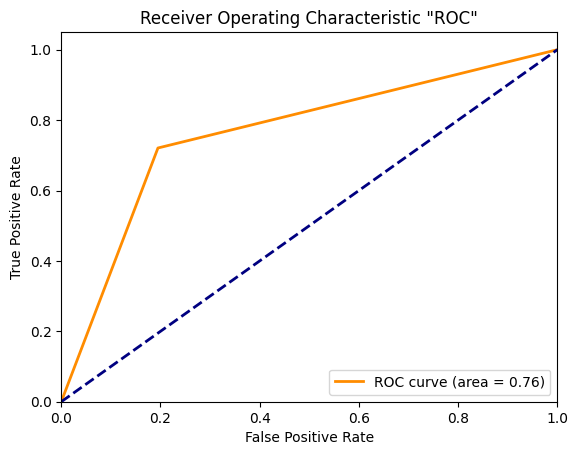

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, NB_y_pred_test)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds_pr = precision_recall_curve(y_test, NB_y_pred_test)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic "ROC"')
plt.legend(loc="lower right")
plt.show()